In [ ]:
#!/usr/bin/env python3
# -*- coding: utf-8 -*-
"""
Created on Sun Jun 13 18:59:45 2021

@author: leodefaria
"""

## Importação de bibliotecas

In [314]:
# from urllib.request import urlopen
# from urllib.error import HTTPError
# from urllib.error import URLError
# import ssl
import pandas as pd
from bs4 import BeautifulSoup
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

## Importação de dados

In [315]:
# Vacinados

# base original: DADOS ABERTOS - Registros de Vacinação COVID19 - UF: DF
# https://s3-sa-east-1.amazonaws.com/ckan.saude.gov.br/PNI/vacina/uf/2021-06-12/uf%3DDF/part-00000-e7b5a3a9-bb01-40f5-aa63-d3bd2cfe2507.c000.csv
df_vacina = pd.read_csv('/Users/leodefaria/Documents/IDP/dados/part-00000-e7b5a3a9-bb01-40f5-aa63-d3bd2cfe2507.c000.csv', sep=';')

In [327]:
df_vacina_BaseBruta = pd.read_csv('/Users/leodefaria/Documents/IDP/dados/part-00000-e7b5a3a9-bb01-40f5-aa63-d3bd2cfe2507.c000.csv', sep=';')

In [ ]:
# População

# Base Original: IBGE - Dados dos Municípios
# https://cidades.ibge.gov.br/brasil/df/brasilia/panorama
# Populacao = 3055149

In [316]:
# População por faixas

# Base Original: IBGE - Projeção Municípios
# https://www.ibge.gov.br/apps/populacao/projecao/index.html
df_IBGE_F = pd.read_csv('/Users/leodefaria/Documents/IDP/dados/DF - Fx_IdadeM.csv', sep=';')
df_IBGE_M = pd.read_csv('/Users/leodefaria/Documents/IDP/dados/DF - Fx_IdadeH.csv', sep=';')

## Ajuste IBGE

In [317]:
# Separaçao dos dados de 2020 e 2021

# Feminino
df_IBGE_F.drop(df_IBGE_F.columns[1:12], inplace=True, axis=1)
df_IBGE_F.drop(df_IBGE_F.columns[2:], inplace=True, axis=1)

df_IBGE_F.rename(columns={'Faixa/Ano':'faixa',
                         '2021':'Pop_DF'}, inplace=True)


# Masculino
df_IBGE_M.drop(df_IBGE_M.columns[1:12], inplace=True, axis=1)
df_IBGE_M.drop(df_IBGE_M.columns[2:], inplace=True, axis=1)
df_IBGE_M.rename(columns={'Faixa/Ano':'faixa',
                         '2021':'Pop_DF'}, inplace=True)
#df_IBGE_M.drop('Total')

df_IBGE_M.head()


,faixa,Pop_DF
0,Total,1485920
1,0-4,105742
2,5-9,98144
3,10-14,102450
4,15-19,120334


## Ajustes VACINA

In [318]:
# apagando colunas desnecessárias para análise

df_vacina.drop(df_vacina.columns[0:2], inplace=True, axis=1)    # Idade
df_vacina.drop(df_vacina.columns[1], inplace=True, axis=1)      # sexo
df_vacina.drop(df_vacina.columns[2:13], inplace=True, axis=1)   # local_vacina
df_vacina.drop(df_vacina.columns[3:7], inplace=True, axis=1)    # grupoAtendimento
df_vacina.drop(df_vacina.columns[4], inplace=True, axis=1)      # categoria
df_vacina.drop(df_vacina.columns[5:9], inplace=True, axis=1)    # dose
df_vacina.drop(df_vacina.columns[6], inplace=True, axis=1)      # vacina
df_vacina.drop(df_vacina.columns[7:], inplace=True, axis=1)     # resto

# Ajustando nomes colunas

df_vacina.rename(columns={  'paciente_idade':'idade'
                          , 'paciente_enumsexobiologico':'sexo'
                          , 'estalecimento_nofantasia':'local_vacinacao'
                          , 'vacina_grupoatendimento_nome':'grupo_atendimento'
                          , 'vacina_categoria_nome':'vacina_categoria'
                          , 'vacina_descricao_dose':'dose'}, inplace=True)

## Separando DataFrame para 1ª análise: 
### Panorama de vacinação por faixa etária
   

In [319]:
# Separando dataframe para análise

df_vacina_idade = df_vacina[['idade','sexo','dose']]

# limpeza

df_vacina_idade['dose'] = df_vacina_idade['dose'].str.strip() # campo cheio de tabs e espaços


<ipython-input-319-f97834591501>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vacina_idade['dose'] = df_vacina_idade['dose'].str.strip() # campo cheio de tabs e espaços


In [320]:
# Inserindo no dataframe o Range de valores de distribuição do IBGE

campos=labels=['0-4', '5-9', '10-14', '15-19', '20-24', '25-29', '30-34', '35-39', '40-44', '45-49', '50-54', '55-59', '60-64', '65-69', '70-74', '75-79', '80-84', '85-89', '90+']

# Quem disse que eu consegui transformar esse simples for em serie...
#for i in range(19):
    #print(str(i*5) + " - " + str(i*5+4))


linhas = pd.Series(np.arange(0,100,5))   # bins=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,95,100]

df_vacina_idade['faixa'] = pd.cut(x=df_vacina_idade['idade']
                                  , bins=linhas
                                  , labels=campos)


df_vacina_idade.head()#describe()

<ipython-input-320-f0547dc92b8f>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_vacina_idade['faixa'] = pd.cut(x=df_vacina_idade['idade']


,idade,sexo,dose,faixa
0,59,F,1ª Dose,55-59
1,47,F,1ª Dose,45-49
2,51,F,1ª Dose,50-54
3,45,F,1ª Dose,40-44
4,59,M,1ª Dose,55-59


In [321]:
# Campo do inferno que não "pegava" filtro de jeito nenhum

# df_vacina_idade.dose[0]


In [322]:
# separando df por sexo

df_vacina_idade_M = df_vacina_idade[df_vacina_idade['sexo']=='M']
df_vacina_idade_F = df_vacina_idade[df_vacina_idade['sexo']=='F']


del df_vacina_idade_M['sexo']
del df_vacina_idade_F['sexo']


#separando df por dose
df_vacina_idade_M_1d = df_vacina_idade_M[df_vacina_idade_M['dose']=='1ª\xa0Dose']
df_vacina_idade_M_2d = df_vacina_idade_M[df_vacina_idade_M['dose']=='2ª\xa0Dose']

df_vacina_idade_F_1d = df_vacina_idade_F[df_vacina_idade_F['dose']=='1ª\xa0Dose']
df_vacina_idade_F_2d = df_vacina_idade_F[df_vacina_idade_F['dose']=='2ª\xa0Dose']

del df_vacina_idade_M_1d['dose']
del df_vacina_idade_M_2d['dose']

del df_vacina_idade_F_1d['dose']
del df_vacina_idade_F_2d['dose']


# Agregação por faixas (igualar com ibge)
df_vacina_idade_M_1d_AGG = df_vacina_idade_M_1d.groupby(['faixa']).agg('count')
df_vacina_idade_M_2d_AGG = df_vacina_idade_M_2d.groupby(['faixa']).agg('count') 

df_vacina_idade_F_1d_AGG = df_vacina_idade_F_1d.groupby(['faixa']).agg('count')
df_vacina_idade_F_2d_AGG = df_vacina_idade_F_2d.groupby(['faixa']).agg('count') 


df_vacina_idade_M_1d_AGG.rename(columns={'idade':'Dose1'}, inplace=True)
df_vacina_idade_M_2d_AGG.rename(columns={'idade':'Dose2'}, inplace=True)


df_vacina_idade_F_1d_AGG.rename(columns={'idade':'Dose1'}, inplace=True)
df_vacina_idade_F_2d_AGG.rename(columns={'idade':'Dose2'}, inplace=True)


# df_vacina_idade_M_1d_AGG.reset_index()
# df_vacina_idade_F_1d_AGG.reset_index()


df_vacina_M = pd.merge(df_vacina_idade_M_1d_AGG, df_vacina_idade_M_2d_AGG, how = 'inner', on = 'faixa')
df_vacina_M = pd.merge(df_vacina_M, df_IBGE_M, how = 'inner', on = 'faixa')


df_vacina_F = pd.merge(df_vacina_idade_F_1d_AGG, df_vacina_idade_F_2d_AGG, how = 'inner', on = 'faixa')
df_vacina_F = pd.merge(df_vacina_F, df_IBGE_F, how = 'inner', on = 'faixa')



df_vacina_F

,faixa,Dose1,Dose2,Pop_DF
0,0-4,0,1,100475
1,5-9,1,0,92954
2,10-14,3,0,97974
3,15-19,2599,546,117084
4,20-24,14313,6661,127130
5,25-29,19864,10593,129843
6,30-34,23410,12044,135194
7,35-39,27297,13200,146505
8,40-44,27128,10901,141258
9,45-49,25617,8066,118439


## Gráficos

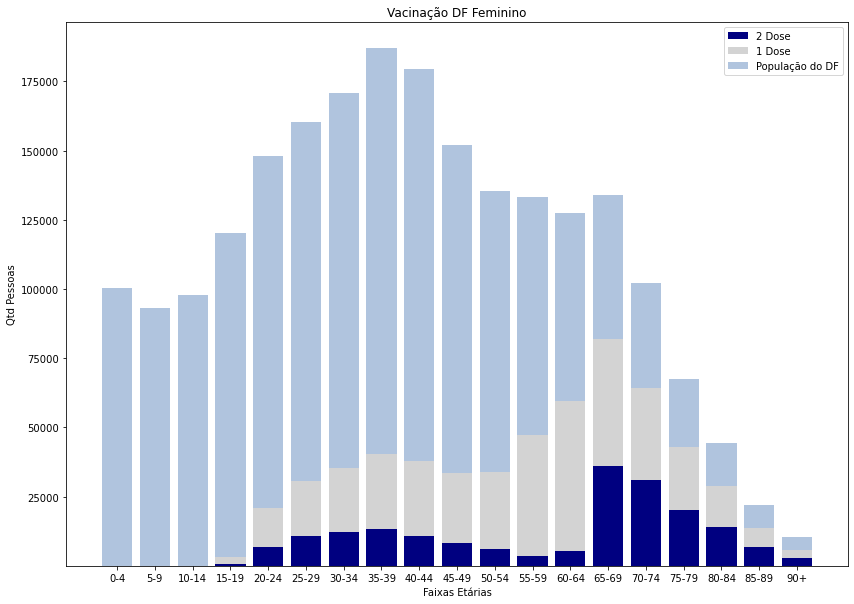

In [252]:
# Gráfico Vacinaçao Feminino

plt.figure(figsize=(14,10))

faixa = df_vacina_F['faixa']
popM =  df_vacina_F['Pop_DF']
Dose1 = df_vacina_F['Dose1']
Dose2 = df_vacina_F['Dose2']

plt.bar(faixa, Dose2,color='navy')
plt.bar(faixa, Dose1,color='lightgray', bottom = Dose2)
plt.bar(faixa, popM, color='lightsteelblue', bottom = Dose2 + Dose1)

plt.xlabel('Faixas Etárias')
plt.ylabel('Qtd Pessoas')
plt.title('Vacinação DF Feminino')
plt.legend(('2 Dose','1 Dose','População do DF' ))

plt.show()

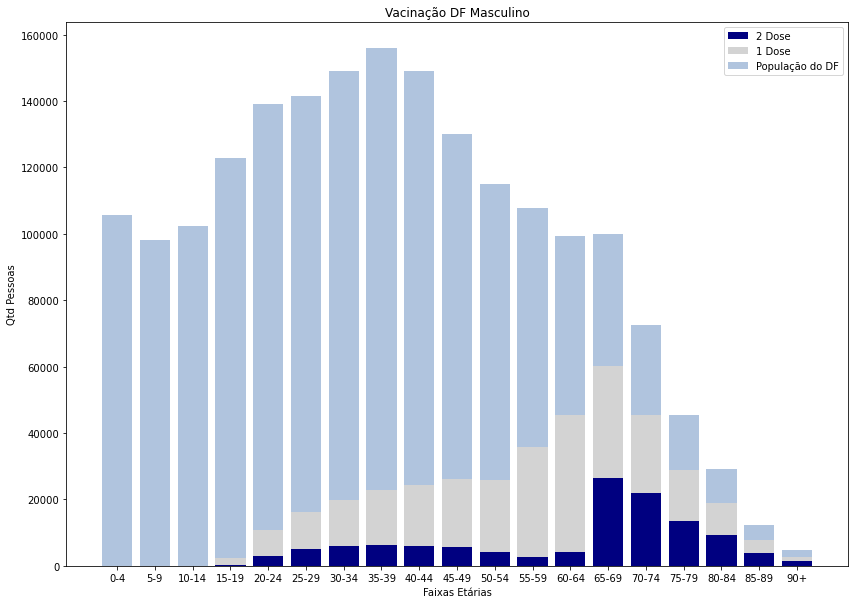

In [323]:
# Gráfico Vacinaçao Masculino

plt.figure(figsize=(14,10))

faixa = df_vacina_M['faixa']
popM =  df_vacina_M['Pop_DF']
Dose1 = df_vacina_M['Dose1']
Dose2 = df_vacina_M['Dose2']

plt.bar(faixa, Dose2,color='navy')
plt.bar(faixa, Dose1,color='lightgray', bottom = Dose2)
plt.bar(faixa, popM, color='lightsteelblue', bottom = Dose2 + Dose1)

plt.xlabel('Faixas Etárias')
plt.ylabel('Qtd Pessoas')
plt.title('Vacinação DF Masculino')
plt.legend(('2 Dose','1 Dose','População do DF' ))

plt.show()

## Demais correlações

In [324]:
df_vacina.head()

,idade,sexo,local_vacinacao,grupo_atendimento,vacina_categoria,dose,vacina_nome
0,59,F,UBS 2 SOBRADINHO II,Diabetes Mellitus,Comorbidades,1ª Dose,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...
1,47,F,POLICLINICA LAGO SUL,Psicólogo,Trabalhadores de Saúde,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan
2,51,F,UBS 01 ASA SUL,Diabetes Mellitus,Comorbidades,1ª Dose,Vacina Covid-19 - Covishield
3,45,F,UBS 01 ASA SUL,Técnico de Enfermagem,Trabalhadores de Saúde,1ª Dose,Covid-19-Coronavac-Sinovac/Butantan
4,59,M,UBS 1 SOBRADINHO,Pneumopatias Crônicas Graves,Comorbidades,1ª Dose,Vacina Covid-19 - Covishield


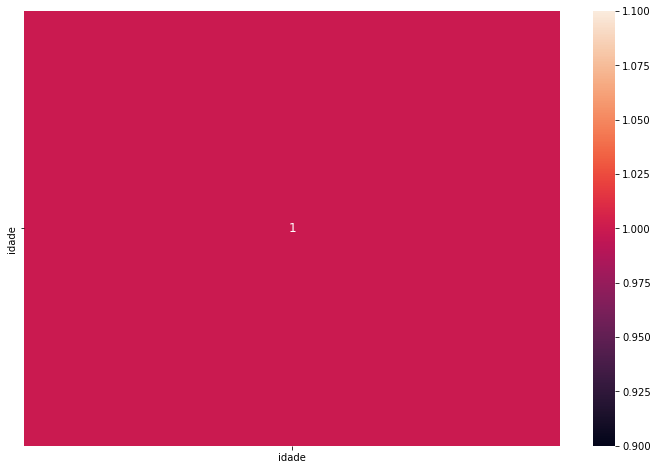

In [325]:

df_corr = df_vacina.corr()

plt.figure(figsize=(12,8))
sns.heatmap(df_corr, annot=True, annot_kws={"size": 12})
plt.show()

In [331]:
df_vacinaAGG = df_vacina.groupby(['local_vacinacao']).agg('count')
df_vacinaAGG#.head(10)

,idade,sexo,grupo_atendimento,vacina_categoria,dose,vacina_nome
local_vacinacao,,,,,,
DEPARTAMENTO MEDICO CAMARA DOS DEPUTADOS,88,88,88,88,88,88
HFA,5013,5013,5013,5013,5013,5013
HOSPITAL DE BASE DO DISTRITO FEDERAL,6494,6494,6494,6494,6494,6494
HOSPITAL DE FORCA AEREA DE BRASILIA HFAB,1720,1720,1720,1720,1720,1720
HOSPITAL MATERNO INFANTIL DE BRASILIA HMIB,3381,3381,3381,3381,3381,3381
...,...,...,...,...,...,...
UBS 7 GAMA,20937,20937,20799,20720,20937,20937
UBS 7 SANTA MARIA,3364,3364,3258,3253,3364,3364
UBS 8 CEILANDIA,57,57,57,55,57,57


In [335]:
df_vacinaAGGcat = df_vacina.groupby(['vacina_categoria']).agg('count')
df_vacinaAGGcat#.head(10)

,idade,sexo,local_vacinacao,grupo_atendimento,dose,vacina_nome
vacina_categoria,,,,,,
Comorbidades,133608,133608,133608,133608,133608,133608
Faixa Etária,532444,532444,532444,532444,532444,532444
Forças Armadas (membros ativos),3703,3703,3703,3703,3703,3703
Forças de Segurança e Salvamento,23112,23112,23112,23112,23112,23112
Funcionário do Sistema de Privação de Liberdade,1277,1277,1277,1277,1277,1277
Pessoas com Deficiência,8330,8330,8330,8330,8330,8330
Pessoas de 60 anos ou mais institucionalizadas,7632,7632,7632,7632,7632,7632
Pessoas em Situação de Rua,41,41,41,41,41,41
População Privada de Liberdade,42,42,42,42,42,42


In [336]:
df_vacinaAGGvac = df_vacina.groupby(['vacina_nome']).agg('count')
df_vacinaAGGvac#.head(10)

,idade,sexo,local_vacinacao,grupo_atendimento,vacina_categoria,dose
vacina_nome,,,,,,
Covid-19-AstraZeneca,44077,44077,44077,44000,43721,44077
Covid-19-Coronavac-Sinovac/Butantan,518519,518519,518519,517962,517141,518519
Vacina Covid-19 - Covishield,374413,374413,374413,368670,367463,374413
Vacina covid-19 - BNT162b2 - BioNTech/Fosun Pharma/Pfizer,38471,38471,38471,37956,36792,38471


In [329]:
df_vacina_BaseBruta.head(2)

,document_id,paciente_id,paciente_idade,paciente_datanascimento,paciente_enumsexobiologico,paciente_racacor_codigo,paciente_racacor_valor,paciente_endereco_coibgemunicipio,paciente_endereco_copais,paciente_endereco_nmmunicipio,paciente_endereco_nmpais,paciente_endereco_uf,paciente_endereco_cep,paciente_nacionalidade_enumnacionalidade,estabelecimento_valor,estabelecimento_razaosocial,estalecimento_nofantasia,estabelecimento_municipio_codigo,estabelecimento_municipio_nome,estabelecimento_uf,vacina_grupoatendimento_codigo,vacina_grupoatendimento_nome,vacina_categoria_codigo,vacina_categoria_nome,vacina_lote,vacina_fabricante_nome,vacina_fabricante_referencia,vacina_dataaplicacao,vacina_descricao_dose,vacina_codigo,vacina_nome,sistema_origem,data_importacao_rnds,id_sistema_origem
0,3a8df5d6-3a68-4e4e-a5bd-993f4dbb8cbe-i0b0,f9b29c9c84f126a18e4b36d524ba106fdbe66b0a414b79...,59,1961-10-03,F,4,AMARELA,530010.0,10.0,BRASILIA,BRASIL,DF,73062.0,B,7368895,UNIDADE BASICA DE SAUDE N 2 SOBRADINHO II,UBS 2 SOBRADINHO II,530010,BRASILIA,DF,103,Diabetes Mellitus,1.0,Comorbidades,EW0195,MINISTERIO DA SAUDE,Organization/00394544000851,2021-05-18,1ª Dose,87,Vacina covid-19 - BNT162b2 - BioNTech/Fosun Ph...,Novo PNI,2021-05-18T18:54:48.000Z,NaN
1,001ce155-7a49-4e27-b05b-f9938ae9dd35-i0b0,1fa58e38a0c52c1fc9678ee6e597a98e03e4dd70f1397e...,47,1973-07-01,F,99,SEM INFORMACAO,530010.0,10.0,BRASILIA,BRASIL,DF,71615.0,B,9578277,GERENCIA DE SERVICOS DE ATENCAO SECUNDARIA 3,POLICLINICA LAGO SUL,530010,BRASILIA,DF,919,Psicólogo,9.0,Trabalhadores de Saúde,210087,FUNDACAO BUTANTAN,Organization/61189445000156,2021-03-26,1ª Dose,86,Covid-19-Coronavac-Sinovac/Butantan,Novo PNI,2021-04-05T15:50:40.000Z,NaN
